 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [2]:
pwd

'c:\\Users\\jakel\\Fintech_BC_21\\03_04_Whale_Portfolio_Analysis'

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns = pd.read_csv('Resources/whale_returns.csv', index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns = pd.read_csv('Resources/algo_returns.csv', index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_data = pd.read_csv('Resources/sp500_history.csv', index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500_data.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [10]:
# Check Data Types
sp500_data.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_edit = sp500_data.copy()                                       # make copy of the original data, so we retain original values. 
sp500_edit['Close'] = sp500_edit['Close'].str.replace('$', '')       # replace/drop the $ sign, and replace with nothing
sp500_edit['Close'] = sp500_edit['Close'].astype('float')            # cast the type as float, so we can use to calc .pct_change()
sp500_edit.dtypes

c:\Users\jakel\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


Close    float64
dtype: object

In [12]:
sp500_edit.isnull().sum()

Close    0
dtype: int64

In [13]:
# Calculate Daily Returns
sp500_returns = sp500_edit.pct_change()
sp500_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [14]:
# Drop nulls
sp500_returns.dropna(inplace=True)
sp500_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.rename(columns={'Close' : 'SP 500 Close'}, inplace=True)
sp500_returns.columns

Index(['SP 500 Close'], dtype='object')

## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
total_portfolio = pd.concat([whale_returns, algo_returns, sp500_returns], axis='columns', join='inner')
total_portfolio.head() 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Total Portfolio Daily Returns'}, xlabel='Date'>

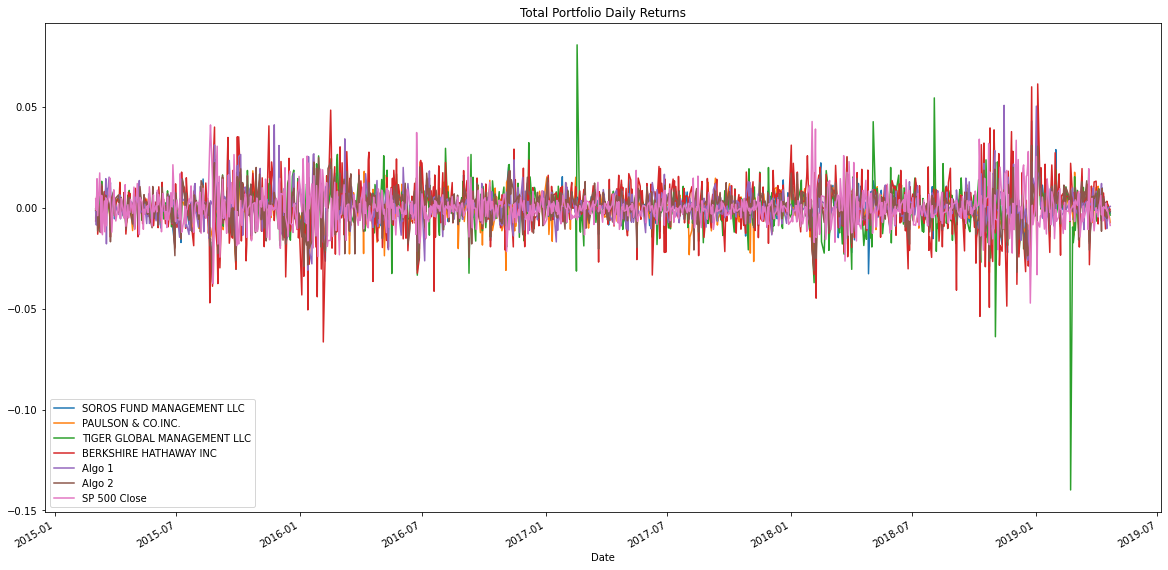

In [17]:
# Plot daily returns of all portfolios
total_portfolio.plot(title='Total Portfolio Daily Returns', figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Total Portfolio Cumulative Returns'}, xlabel='Date'>

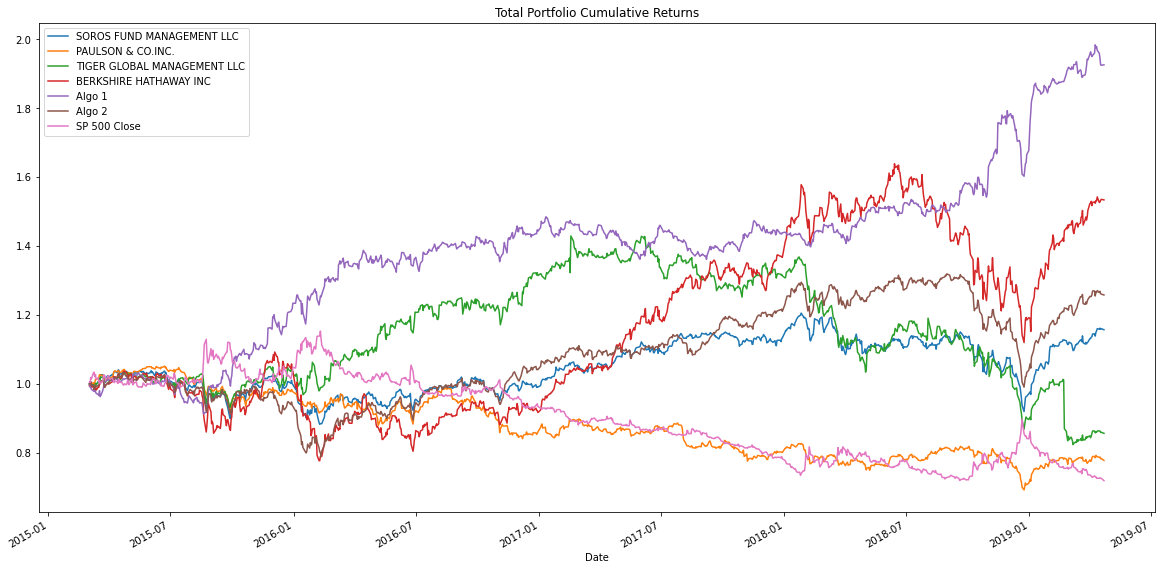

In [18]:
# Calculate cumulative returns of all portfolios
cum_returns = (1 + total_portfolio).cumprod()          # make sure there's no NaN's in the data, but we already dropped before combining all df's.

# Plot cumulative returns
cum_returns.plot(title='Total Portfolio Cumulative Returns', figsize=(20,10))

#### Does any target fund outperform the S&P500?

It looks like the Algo 1 & Berkshire portfolios perform very positive above the SP 500 

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Total Portfolio Risk'}>

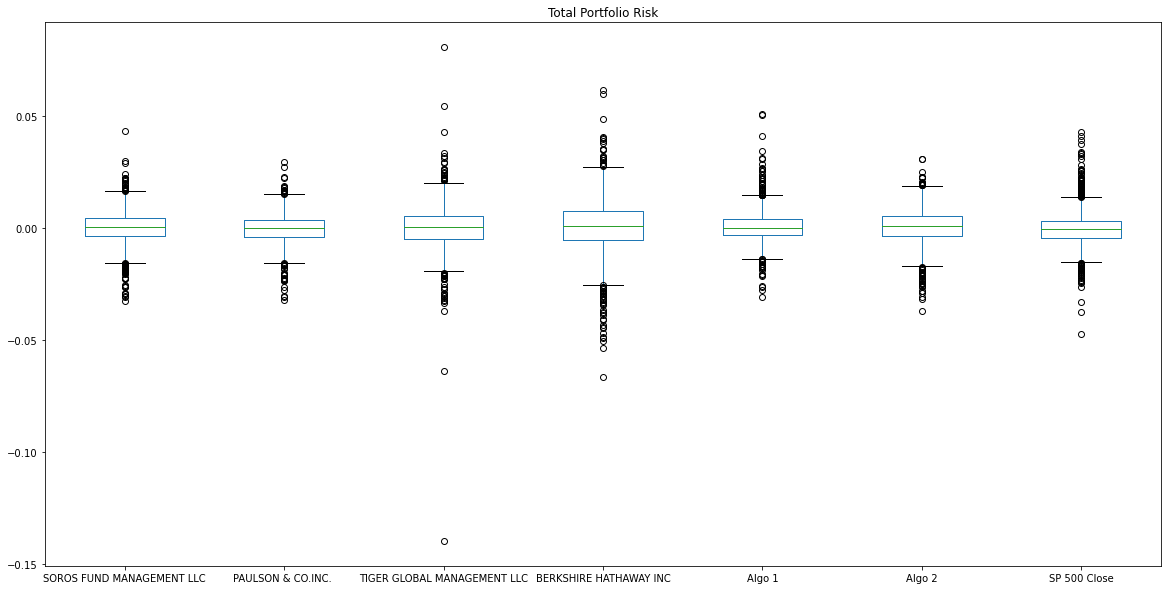

In [19]:
# Box plot to visually show risk
total_portfolio.plot.box(title='Total Portfolio Risk', figsize=(20,10))

# the risk spread for each portfolio option. greater the spread, the greater the risk.
# Berkshire portfolio has the greatest risk spread. 

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
total_std = total_portfolio.std().sort_values(ascending=False)               # total portfolio risk. riskiest to least risky.
total_std

# Berkshire is the riskiest portfolio in the collection of portfolios. 

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
SP 500 Close                   0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = total_portfolio['SP 500 Close'].std()                           # isolating just the SP500 risk alone. annualized is multiplied by square root of 252

# Determine which portfolios are riskier than the S&P 500. True values means they're riskier than SP500. 
# Only Berkshire Hathaway and Tiger Global are riskier than S&P500.
total_std > sp500_std

# Standard deviation measures risk of mass gains or losses. 
# If the portfolio is riskier than the safe-bet (no-risk) SP500, it will return True value.
# Everything that's False means it is less risky than the SP 500. 
# If a portfolio is riskier than SP500, than it will have a higher payout. 

BERKSHIRE HATHAWAY INC          True
TIGER GLOBAL MANAGEMENT LLC     True
SP 500 Close                   False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
Algo 1                         False
PAULSON & CO.INC.              False
dtype: bool

### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
total_annual_std = (total_std * np.sqrt(252)).sort_values(ascending=False)                      # sort values by riskiest (highest std dev) to least risky.
total_annual_std

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
SP 500 Close                   0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

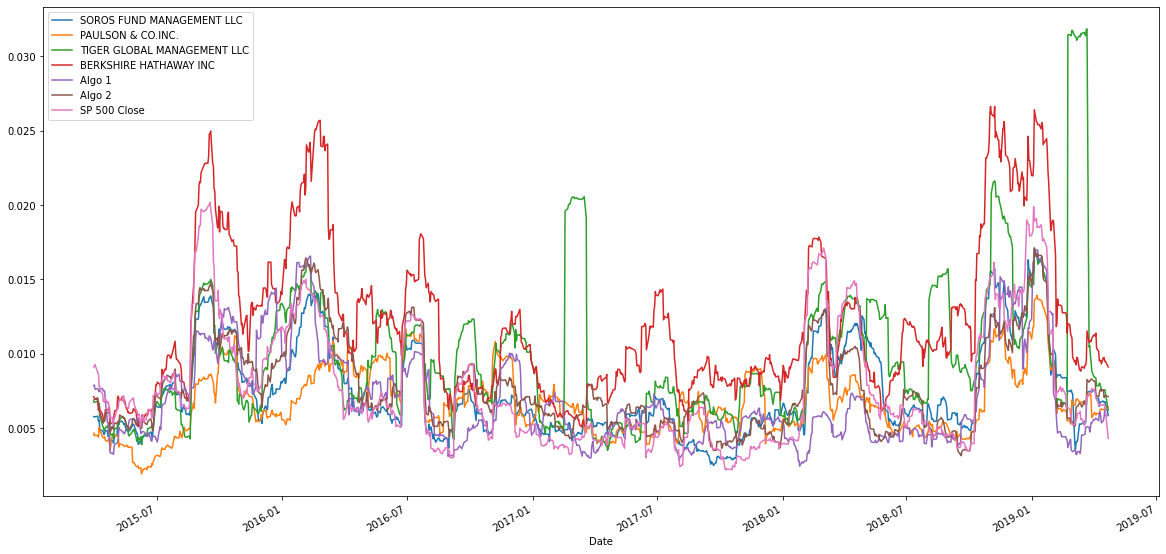

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = total_portfolio.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

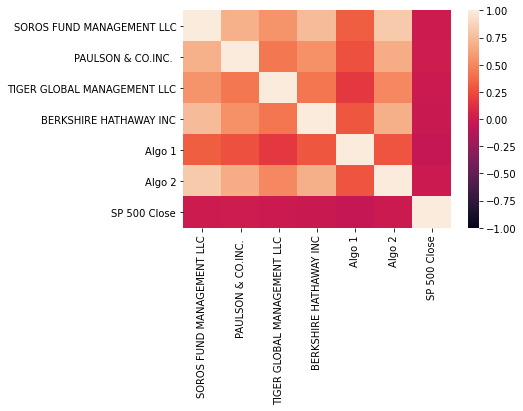

In [24]:
# Calculate the correlation
correlation = total_portfolio.corr()

# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

In [25]:
# Correlation grid
correlation.background_gradient(cmap='summer')

AttributeError: 'DataFrame' object has no attribute 'background_gradient'

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

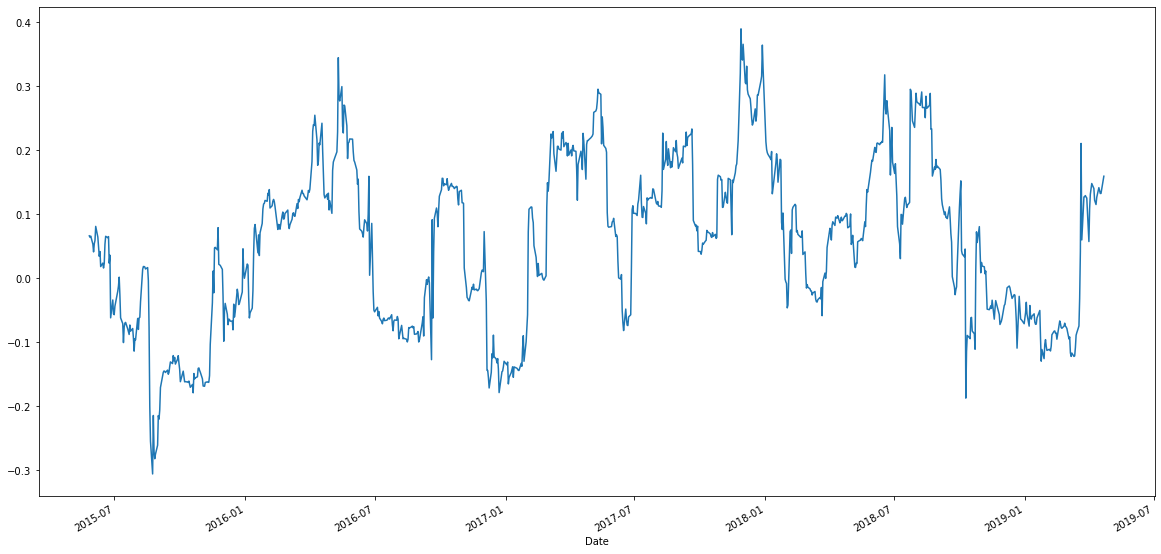

In [26]:
# Calculate covariance of a single portfolio
# rolling covariance of 60-days
# I'm choosing the Soros Fund. 
soros_rolling_cov = total_portfolio['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(total_portfolio['SP 500 Close'])

# Calculate variance of S&P 500
# rolling variance of 60-days
sp500_rolling_var = total_portfolio['SP 500 Close'].rolling(window=60).var()   

# Computing beta
# rolling 60-day beta
soros_rolling_beta = soros_rolling_cov / sp500_rolling_var

# Plot beta trend
soros_rolling_beta.plot(figsize=(20,10))

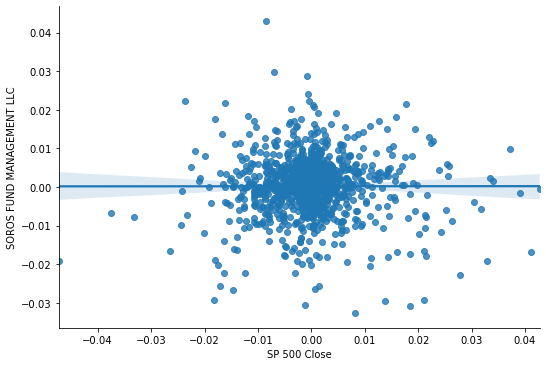

In [38]:
# Plot Beta vs Correlation
sns.lmplot(
    x = 'SP 500 Close',
    y = 'SOROS FUND MANAGEMENT LLC',
    data = total_portfolio,
    aspect = 1.5,
    fit_reg = True
)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

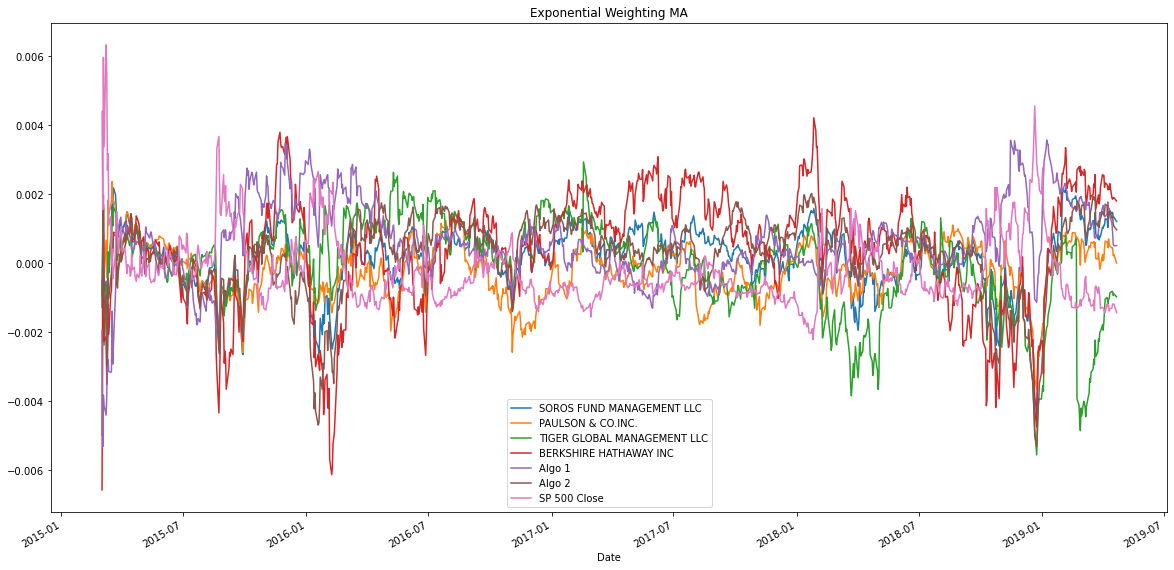

In [27]:
# Use `ewm` to calculate the rolling window
total_ewma = total_portfolio.ewm(halflife=21).mean().plot(title='Exponential Weighting MA', figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
# 252 * difference between the average return of entire portfolio AND average return of the risk-free investment (SP 500 Close)
# standard deviation of entire portfolio * square root of 252 trading days.

sharpe_ratios = (252 * (total_portfolio.mean() - total_portfolio['SP 500 Close'].mean())) / (total_portfolio.std() * np.sqrt(252))
sharpe_ratios.sort_values(ascending=False)

# A high sharpe ratio (return-to-risk) means there's potential for high returns and high risk taken. 
# SP500 is the risk-free investment, so the value is zero. 

Algo 1                         1.953767
Algo 2                         1.018189
BERKSHIRE HATHAWAY INC         0.951436
SOROS FUND MANAGEMENT LLC      0.906838
TIGER GLOBAL MANAGEMENT LLC    0.278448
PAULSON & CO.INC.              0.142411
SP 500 Close                   0.000000
dtype: float64

<AxesSubplot:title={'center':'Total Sharpe Ratios'}>

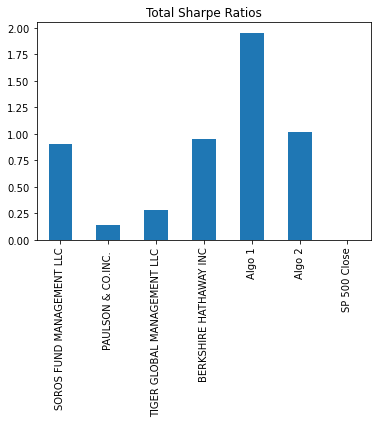

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Total Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The Algo 1 fund is the most returns. Soros Fund, Berkshire-Hathaway, and Algo have the same return-to-risk. Paulson is the lowest. No fund has potential losses, so you will make money on each risky investment. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [32]:
# Reading daily returns data from 1st stock
goog_df = pd.read_csv('resources/goog_historical.csv', index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
goog_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [44]:
# Reading daily returns data from 2nd stock
aapl_df = pd.read_csv('resources/aapl_historical.csv', index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
aapl_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [45]:
# Reading daily returns data from 3rd stock
cost_df = pd.read_csv('resources/cost_historical.csv', index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [49]:
# Combine all stocks in a single DataFrame
custom_portfolio = pd.concat([goog_df, aapl_df, cost_df], axis='rows', join='inner')       # make sure your axis is rows, it needs to be a vertical report. 
custom_portfolio.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [50]:
# Reset Date index
custom_portfolio.reset_index(inplace=True)

In [51]:
# Reorganize portfolio data by having a column per symbol using a pivot table
custom_portfolio = custom_portfolio.pivot_table(index='Trade DATE', columns='Symbol', values='NOCP')
custom_portfolio.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [52]:
# Calculate daily returns for the entire portfolio each trade day. 
custom_daily_returns = custom_portfolio.pct_change()

# Drop NAs
custom_daily_returns.dropna(inplace=True)

# Display sample data
custom_daily_returns.head() 

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [53]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_portfolio_returns = custom_daily_returns.dot(weights)    # this is taking the daily returns of all three stocks, multiplies each stock daily return by 1/3, and then adds all together.

# Display sample data
custom_portfolio_returns.head()

# custom_daily_returns displays the daily return for each unique stock per trade day
# customer porfolio returns adds all stock daily returns together and multiplies each by 1/3, since we are investing evenly in each stock. 


Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [59]:
# Join your returns DataFrame to the original returns DataFrame
comparison_df = pd.concat([total_portfolio, custom_portfolio_returns], axis='columns', join='inner')
comparison_df.rename(columns= { 0 : 'JOHN KELLY FUND'}, inplace=True)
comparison_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500 Close,JOHN KELLY FUND
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.006061


In [60]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
comparison_df.isnull().sum()
comparison_df.dropna(inplace=True)


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP 500 Close                   0
JOHN KELLY FUND                0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [61]:
# Calculate the annualized `std`
final_fund_returns = comparison_df.copy()
final_fund_volatility = final_fund_returns.std() * np.sqrt(252)
final_fund_volatility.sort_values(ascending=False)

# Wow, my fund is the third most volatile! Very risky I am! 

BERKSHIRE HATHAWAY INC         0.247305
TIGER GLOBAL MANAGEMENT LLC    0.232898
JOHN KELLY FUND                0.211627
SP 500 Close                   0.152469
SOROS FUND MANAGEMENT LLC      0.146812
Algo 2                         0.139499
Algo 1                         0.133927
PAULSON & CO.INC.              0.116928
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Comparison of Volatility, ME vs the Professionals'}>

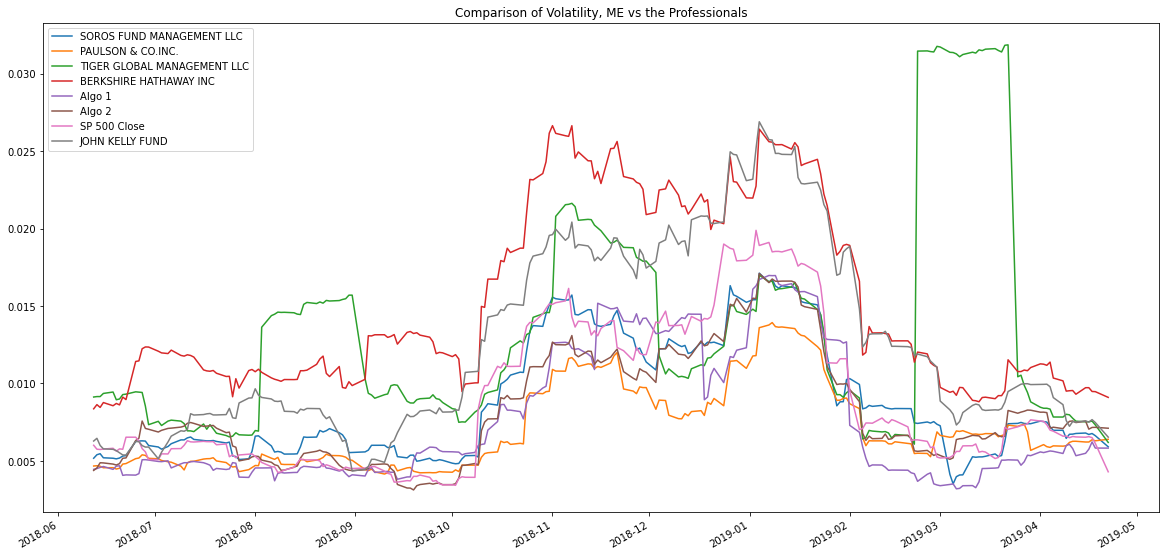

In [63]:
# Calculate rolling standard deviation
final_rolling_volatility = final_fund_returns.rolling(window =21).std()

# Plot rolling standard deviation
final_rolling_volatility.plot(title='Comparison of Volatility, ME vs the Professionals', figsize=(20,10))


### Calculate and plot the correlation

<AxesSubplot:>

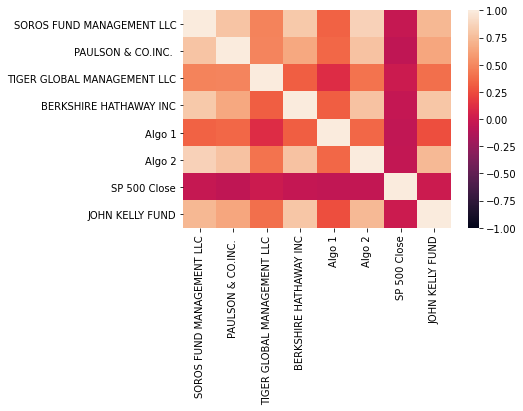

In [64]:
# Calculate and plot the correlation
final_correlation = final_fund_returns.corr() 
sns.heatmap(final_correlation, vmin=-1, vmax=1)

# My fund is very uncorrelated to the SP 500 Close
# My fund is highly correlated to the Soros Fund, the Paulson Fund, and Berkshire Hathaway

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

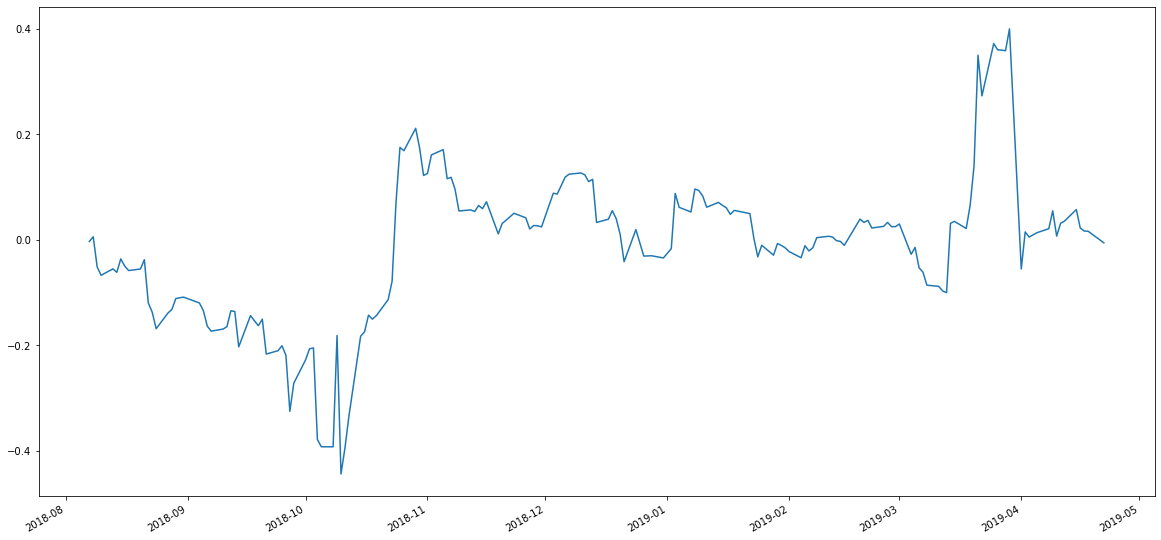

In [65]:
# Calculate and plot Beta
final_rolling_cov = final_fund_returns['JOHN KELLY FUND'].rolling(window=60).cov(final_fund_returns['SP 500 Close'])
final_beta = final_rolling_cov / sp500_rolling_var               # we calcuated the SP 500 rolling variance earlier.
final_beta.plot(figsize=(20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [66]:
# Calculate Annualzied Sharpe Ratios
final_sharpe_ratios = (252 * (final_fund_returns.mean() - final_fund_returns['SP 500 Close'].mean())) / (final_fund_returns.std() * np.sqrt(252))
final_sharpe_ratios.sort_values(ascending=False)

# Sharpe ratio is ratio of return-to-risk. 
# Our fund has a very high sharpe ratio, this mean we are taking a lot of risk, but will also have lots of reward.
# The Tiger fund performs worse than the risk-free SP 500, 

Algo 1                         2.488145
JOHN KELLY FUND                1.184275
SOROS FUND MANAGEMENT LLC      0.824162
PAULSON & CO.INC.              0.785247
Algo 2                         0.474771
BERKSHIRE HATHAWAY INC         0.366677
SP 500 Close                   0.000000
TIGER GLOBAL MANAGEMENT LLC   -0.786653
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios Across All Funds vs SP 500'}>

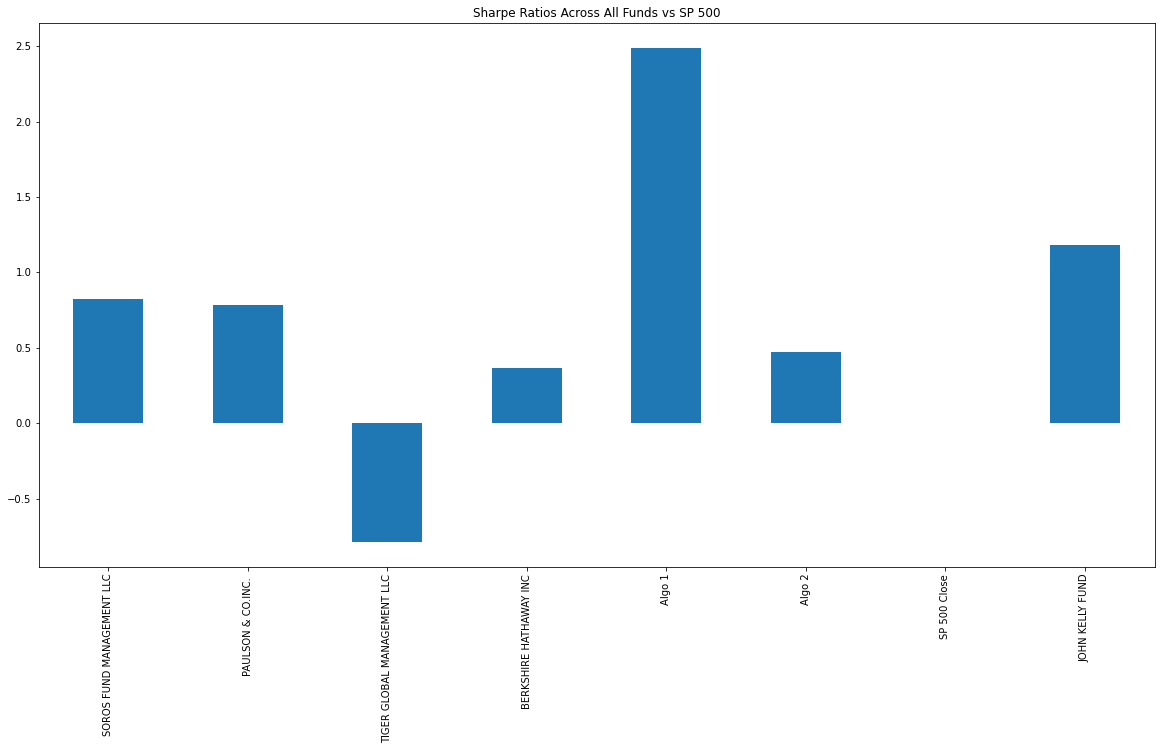

In [68]:
# Visualize the sharpe ratios as a bar plot
final_sharpe_ratios.plot(kind='bar', title='Sharpe Ratios Across All Funds vs SP 500', figsize=(20,10))

### How does your portfolio do?

As an investor the most optimized portfolio we want has the following attributes:

* Un-correlated diversified stocks. It needs to be very uncorrealted to the risk-free investment. 
* Low volatility/risk, a low annualized standard deviation.
* A high sharpe ratio, a high return-to-risk ratio. 

The John Kelly Fund when compared to all others is uncorrelated to the SP 500, but it is quite volatile, but it has the second highest return-to-risk ratio. Our fund when compared to the SP 500 (risk-free investment) is quite attractive. The most optimal fund is the algorithmic fund.  

In [69]:
# Save the total portfolio to a csv file, this way you don't need to read-in and combine different csv dataframes.
total_portfolio.to_csv('total_portfolio.csv')
custom_portfolio_returns.to_csv('john_kelly_portfolio.csv')
final_fund_returns.to_csv('complete_fund_returns.csv')